<a href="https://colab.research.google.com/github/karimabenihda/classification-d-images/blob/main/Classification_d%E2%80%99Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !nvidia-smi

import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-v0_8')
sns.set_theme()




2.19.0


Importer tous les dependencies

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(len(X_test.shape))
print(len(X_test.shape))

print(np.unique(y_train))



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
3
3
[0 1 2 3 4 5 6 7 8 9]


telecharger data et tester les shapes du train & test

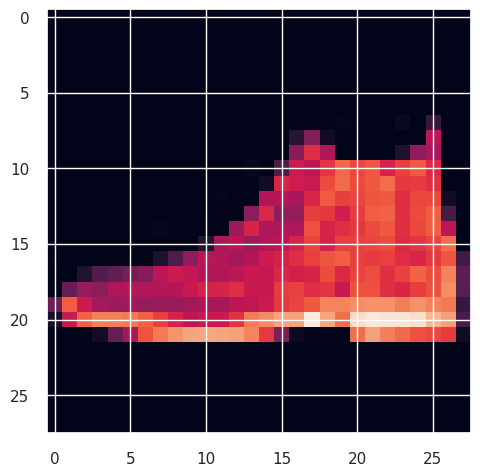

In [ ]:
# print(y_train)

plt.imshow(X_test[0])

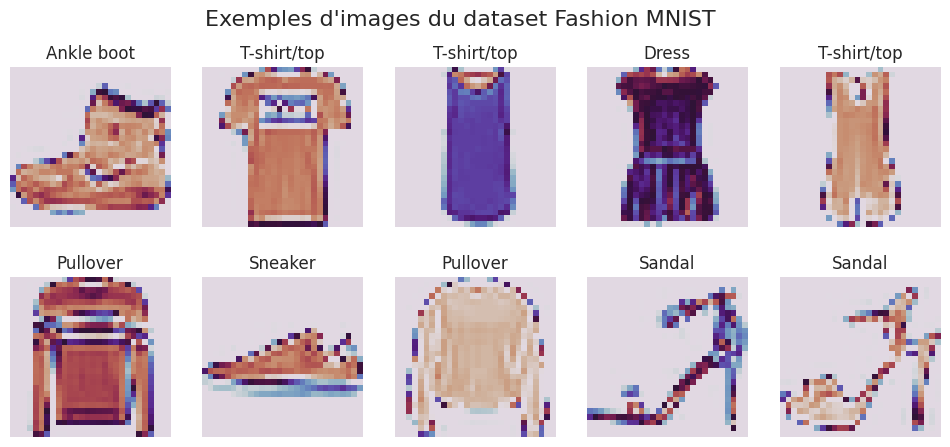

In [ ]:
class_names=[
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
  ]

plt.figure(figsize=(12,5))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i],cmap='twilight')
  plt.title(class_names[y_train[i]])
  plt.axis('off')

plt.suptitle("Exemples d'images du dataset Fashion MNIST", fontsize=16)
plt.show()


In [ ]:
afficher les articles avec matplotlib

0(T-shirt/top):6000
1(Trouser):6000
2(Pullover):6000
3(Dress):6000
4(Coat):6000
5(Sandal):6000
6(Shirt):6000
7(Sneaker):6000
8(Bag):6000
9(Ankle boot):6000


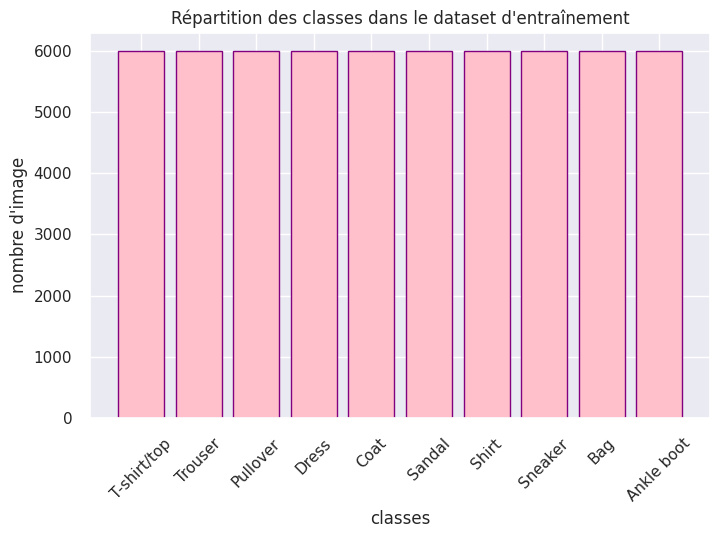

In [ ]:
unique,counts=np.unique(y_train,return_counts=True)
for label , counts in zip(unique,counts):
  print(f"{label}({class_names[label]}):{counts}")
plt.figure(figsize=(8,5))
plt.bar(unique,counts,tick_label=class_names,color='pink',edgecolor='purple')
plt.title("Répartition des classes dans le dataset d'entraînement")
plt.xlabel('classes')
plt.ylabel("nombre d'image")
plt.xticks(rotation=45)
plt.show()

Visualiser la Répartition des classes dans le dataset d'entraînement pour savoire si le dataset est equilibrer ou non car si on a la dominance d'une classes sur les autre classes le model va focucer sur celle qui est dominante

In [ ]:
#normalisation
print("X_test", X_test)
X_train=X_train / 255.0
X_test=X_test / 255.0

print("Valeurs minimales et maximales après normalisation :")
print("X_train :",X_train.min(),"->",X_train.max())
print("X_test :",X_test.min(),"->",X_test.max())
print("X_test",X_test)

X_test [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Valeurs minimales et maximales après normalisation :
X_train : 0.0 -> 1.0
X_test : 0.0 -> 1.0
X_test [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0.

In [ ]:
model=Sequential([
     Flatten(input_shape=(28, 28)),
      Dense(128, activation='relu'),
      Dense(10, activation='softmax')
])

#compilation
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
              )


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
    )

In [ ]:
history=model.fit(
    X_train,y_train,
    epochs=20,
    validation_data=(X_test,y_test),
    callbacks=[early_stop]
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7784 - loss: 0.6307 - val_accuracy: 0.8500 - val_loss: 0.4224
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3823 - val_accuracy: 0.8518 - val_loss: 0.3992
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8730 - loss: 0.3463 - val_accuracy: 0.8605 - val_loss: 0.4056
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8847 - loss: 0.3146 - val_accuracy: 0.8709 - val_loss: 0.3551
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8906 - loss: 0.2949 - val_accuracy: 0.8781 - val_loss: 0.3372
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8960 - loss: 0.2825 - val_accuracy: 0.8769 - val_loss: 0.3454
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9031 - loss: 0.2641 - val_accuracy: 0.8796 - val_loss: 0.3381


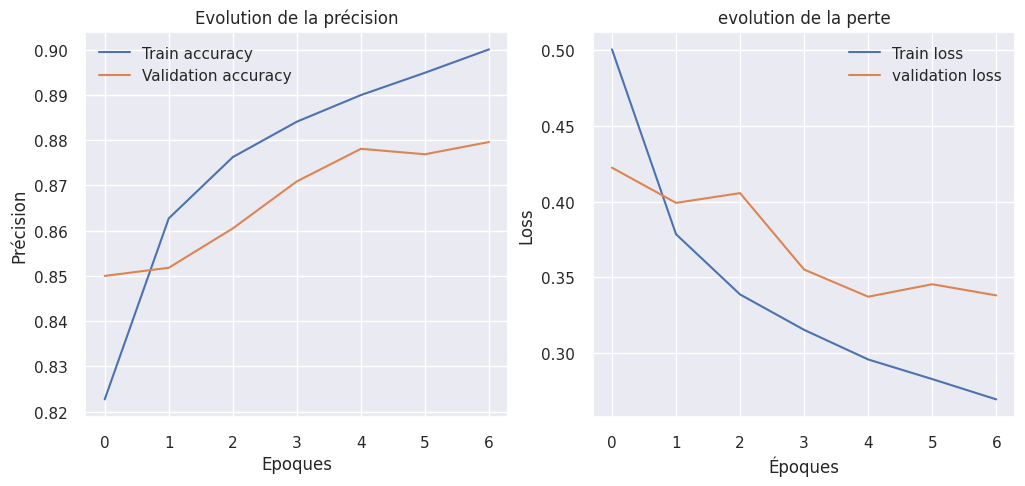

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Evolution de la précision')
plt.xlabel('Epoques')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('evolution de la perte')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
print(model.evaluate(X_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8783 - loss: 0.3307
[0.3371794819831848, 0.8780999779701233]
